## Great Circle Calculation

Overview:
- [x] [gc_onarc](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_onarc.shtml):  Determines if a point on the globe lies on a specified great circle arc (uxarray)
- [x] [gc_latlon](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_latlon.shtml): Finds the great circle distance (true surface distance) between two points on the globe and interpolates points along the great circle (geopy and pyproj)
- [ ] [gc_pnt2gc](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_pnt2gc.shtml):  Finds the angular distance from a point to a great circle 
- [ ] [gc_aangle](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_aangle.shtml):  Finds the acute angle between two great circles on the globe. 
- [ ] [gc_dangle](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_dangle.shtml):  Finds the directed angle between two great circles having a specified intersection point. 
- [ ] [gc_clkwise](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_clkwise.shtml):  Tests clockwise/counterclockwise ordering of points on spherical polygon. 
- [ ] [gc_inout](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_inout.shtml):  Determines if a list of lat/lon specified points are inside or outside of spherical lat/lon polygon(s). 
- [ ] [gc_qarea](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_qarea.shtml):  Finds the area of a quadrilateral patch on the unit sphere. 
- [ ] [gc_tarea](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_tarea.shtml):  Finds the area of a triangular patch on the unit sphere. 

In [1657]:
import numpy as np

In [1658]:
earth_radius = 6378137  # meters

# Based on WSG-84: https://gscommunitycodes.usf.edu/geoscicommunitycodes/public/geophysics/Gravity/earth_shape.php

## Cartesian Coordinates

Cartesian coordinates describe points in space based on perpendicular axis lines that meet at a singlle point of orign, where any point's position is described based on the distance to the orgin along xyz axis

## Spherical Coordinates

Spherical coordinates describe points in space based on three values: radial distance (rho, r) along the radial line between point and the origin, polar angle (theta, θ) between the radial line and the polar axis, and azimuth angle (phi, φ) which is the angle of rotation of the radial line around the polar axis. With a fixed radius, the 3-point coordinates (r, θ, φ) provide a coordiante along a sphere

- Radial distance: distance from center to surface of sphere
- Polar angle: angle between radial line and polar axis
- Azimuth angle: angle around polar axis

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Sphericalcoordinates.svg/1024px-Sphericalcoordinates.svg.png" alt="Spherical Coordinate Description from Wikipedia" width=400 />
</p>

In [1659]:
def latlon_to_cartesian_coords(latitude=None, longitude=None, radius=None):
    cart_x = radius * np.cos(latitude) * np.cos(longitude)
    cart_y = radius * np.cos(latitude) * np.sin(longitude)
    cart_z = radius * np.sin(latitude)
    return cart_x, cart_y, cart_z

In [1660]:
# https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/7%3A_Vector_Spaces/5.7%3A_Cylindrical_and_Spherical_Coordinates
def cartestian_to_spherical(cart_x, cart_y, cart_z):
    # Convert from rectangular coordinates to spherical coordinates
    rho = np.sqrt(cart_x**2 + cart_y**2 + cart_z**2)
    theta = np.arctan(cart_y/cart_x)
    phi = np.arccos(cart_z / rho)
    return rho, theta, phi    

https://www.nosco.ch/mathematics/en/great-circle.php

In [1661]:
## Return spherical and cartesian coordiantes dictionary for a new point
def return_all_coords(latitude=None, longitude=None):
    new_coords_dict = {"latitude": latitude, "longitude": longitude}
    cart_x, cart_y, cart_z = latlon_to_cartesian_coords(latitude, longitude, earth_radius)
    new_coords_dict["cart_x"] = cart_x
    new_coords_dict["cart_y"] = cart_y
    new_coords_dict["cart_z"] = cart_z
    rho, theta, phi = cartestian_to_spherical(new_coords_dict["cart_x"], new_coords_dict["cart_y"], new_coords_dict["cart_z"])
    new_coords_dict["rho"] = rho
    new_coords_dict["theta"] = theta
    new_coords_dict["phi"] = phi
    return new_coords_dict

In [1662]:
# Two Points to Create Arc from Boulder -> Boston
boulder_lat = 40.0150
boulder_lon = -105.2705
boston_lat = 42.3601
boston_lon = -71.0589

boulder_coords = return_all_coords(boulder_lat, boulder_lon)
boston_coords = return_all_coords(boston_lat, boston_lon)

## gc_onarc: Determines if a point on the globe lies on a specified great circle arc

In [1663]:
# pip install uxarray
# pip install shapely
# pip install Pillow
# pip install pyparsing
# pip install kiwisolver
# pip install dask
# python -m pip install "dask[dataframe]"
# pip install fsspec
import uxarray as ux

``
uxarray.grid.arcs.point_within_gca(pt, gca_cart, is_directed=False)
``
- pt (numpy.ndarray (float)) – Cartesian coordinates of the point
- gca_cart (numpy.ndarray of shape (2, 3), (np.float or gmpy2.mpfr)) – Cartesian coordinates of the Great Circle Arc (GCR).

### Great Circle Arc

In [1664]:
# Great Circle Arc formed by cartesian coordinates of two points (Boulder -> Boston)
boulder_point = np.array([boulder_coords["cart_x"], boulder_coords["cart_y"], boulder_coords["cart_z"]])
boston_point = np.array([boulder_coords["cart_x"], boulder_coords["cart_y"], boulder_coords["cart_z"]])

great_circle_arc = np.array([boulder_point, boston_point])
print(great_circle_arc.shape)
great_circle_arc

(2, 3)


array([[ -117382.37626   , -4323034.28076309,  4688094.23709248],
       [ -117382.37626   , -4323034.28076309,  4688094.23709248]])

### Point along the great circle arc from Boulder to Boston: Cloverdale
Arc determined via [great circle map](https://www.greatcirclemap.com/roadmap?routes=DEN-BOS) between DIA and Logan Airport

In [1665]:
# Point along the great circle arc: Cloverdale
cloverdale_lat = 38.8055
cloverdale_lon = -123.0172
cloverdale_coords = return_all_coords(cloverdale_lat, cloverdale_lon)
point_on_arc = np.array([cloverdale_coords["cart_x"], cloverdale_coords["cart_y"], cloverdale_coords["cart_z"]])
point_on_arc

array([-2513713.48229094,  1357253.48920046,  5702608.09505361])

In [1666]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = True


### Point NOT along the great circle arc from Boulder to Boston: Wichita  

In [1667]:
### Point NOT along the great circle arc: Wichita
wichita_lat = 37.6872
wichita_lon = -97.3301
wichita_coords = return_all_coords(wichita_lat, wichita_lon)
point_on_arc = np.array([wichita_coords["cart_x"], wichita_coords["cart_y"], wichita_coords["cart_z"]])
point_on_arc

array([-6366484.73786982,  -377798.47782279,   -75973.57036748])

In [1668]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = False


### Point ALMOST along the great circle arc from Boulder to Boston: Omaha   

In [1669]:
# Point NOT along the great circle arc: Omaha
omaha_lat = 37.6872
omaha_lon = -97.3301
omaha_coords = return_all_coords(omaha_lat, omaha_lon)
point_on_arc = np.array([omaha_coords["cart_x"], omaha_coords["cart_y"], omaha_coords["cart_z"]])
point_on_arc

array([-6366484.73786982,  -377798.47782279,   -75973.57036748])

In [1670]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = False


### Point along the great circle arc from (Reversed) Boulder to Boston: Basalt

In [1671]:
# Point along the reversed great circle arc: Basalt
basalt_lat = 39.3725
basalt_lon = -107.0785
basalt_coords = return_all_coords(basalt_lat, basalt_lon)
point_on_arc = np.array([basalt_coords["cart_x"], basalt_coords["cart_y"], basalt_coords["cart_z"]])
point_on_arc

array([-630507.12680923,  170668.54897069, 6344601.21679874])

In [1672]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc, is_directed=False)
print(f"Does the point lie on the great circle (directed) = {does_point_lie_on_arc}")

Does the point lie on the great circle (directed) = True


In [1673]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc, is_directed=True)
print(f"Does the point lie on the great circle (undirected) = {does_point_lie_on_arc}")

Does the point lie on the great circle (undirected) = True


## gc_latlon: Finds the great circle distance (true surface distance) between two points on the globe and interpolates points along the great circle. 

In [1674]:
from pyproj import Geod
geodesic = Geod(ellps="WGS84")

In [1675]:
foward_bearing, reverse_bearing, distance_meter =  geodesic.inv(boulder_coords["longitude"],
                                                    boulder_coords["latitude"],
                                                    boston_coords["longitude"],
                                                    boston_coords["latitude"])

In [1676]:
print(f"Distance between coordinates = {distance_meter/1000} km")

Distance between coordinates = 2862.597479914522 km


### Foward Bearing: direction towards the next point

### Two version: 
- interpolate with N total equally spaced number of points
- interpolate every N meters

In [1677]:
import geopy.distance

def interpolate_points_along_gc(lat_start,
                                lon_start,
                                lat_end,
                                lon_end,
                                distance_between_points_meter): 
    lat_lon_points = [(lat_start, lon_start)]
    
    # move to next point when distance between points is less than the equal distance
    move_to_next_point = True
    while(move_to_next_point):
        forward_bearing, reverse_bearing, distance_meters = geodesic.inv(lon_start,
                                                                         lat_start, 
                                                                         lon_end,
                                                                         lat_end)
        if distance_meters < distance_between_points_meter:
            # ends before overshooting
            move_to_next_point = False
        else:
            start_point = geopy.Point(lat_start, lon_start)
            distance_to_move = geopy.distance.distance(
                            kilometers=distance_between_points_meter /
                            1000)  # distance to move towards the next point
            final_position = distance_to_move.destination(
                            start_point, bearing=forward_bearing)
            lat_lon_points.append((final_position.latitude, final_position.longitude))
            # new starting position is newly found end position
            lon_start, lat_start = final_position.longitude, final_position.latitude
    lat_lon_points.append((lat_end, lon_end))
    return lat_lon_points

### 1.) Interpolate with _N_ Total Equally Spaced Points

In [1678]:
n_total_points = 10 # total points (n points)

distance_between_points_meter = distance_meter / (n_total_points + 1)
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 260236.1345376838 meters (260.2361345376838 km)


In [1679]:
lat_start, lon_start = boulder_coords["latitude"], boulder_coords["longitude"]
lat_end, lon_end = boston_coords["latitude"], boston_coords["longitude"]

every_n_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_pts)} Total Points")
every_n_pts

12 Total Points


[(40.015, -105.2705),
 (40.64283438472448, -102.32002071588883),
 (41.19386139956729, -99.31719425393653),
 (41.665293789240074, -96.2672998277903),
 (42.054648659580415, -93.17653047007545),
 (42.35980367525436, -90.05192021556941),
 (42.57904824130258, -86.90123344627509),
 (42.711126897374584, -83.73281874084785),
 (42.75527239726805, -80.55543262504408),
 (42.71122644219359, -77.37804142647052),
 (42.57924674954763, -74.20961159223958),
 (42.3601, -71.0589)]

### 2.) Interpolate every N meters

In [1680]:
distance_between_points_meter = 112351
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 112351 meters (112.351 km)


In [1681]:
lat_start, lon_start = boulder_coords["latitude"], boulder_coords["longitude"]
lat_end, lon_end = boston_coords["latitude"], boston_coords["longitude"]

every_n_meters_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_meters_pts)} Total Points")
every_n_meters_pts

27 Total Points


[(40.015, -105.2705),
 (40.29528549842406, -104.00341905484422),
 (40.561568665751025, -102.72608862554382),
 (40.81360756969855, -101.43886851868436),
 (41.05116853963942, -100.14215175538928),
 (41.274027051903765, -98.83636427179823),
 (41.481968612808345, -97.52196438787591),
 (41.67478963217906, -96.19944203574401),
 (41.85229827978712, -94.86931774153358),
 (42.01431531687306, -93.53214135788726),
 (42.16067489479776, -92.1884905476517),
 (42.291225312847395, -90.8389690229252),
 (42.40582972733871, -89.48420454739188),
 (42.50436680442648, -88.12484671369435),
 (42.58673130941052, -86.76156451138083),
 (42.652834625871606, -85.39504370461206),
 (42.702605198629755, -84.02598404223001),
 (42.735988895304544, -82.65509632587766),
 (42.75294928215213, -81.28309936452901),
 (42.75346781084072, -79.91071684595877),
 (42.73754391388529, -78.53867415728898),
 (42.70519500757115, -77.16769518774228),
 (42.65645640233027, -75.79849914708072),
 (42.591381121670025, -74.43179743290122),
 (

### Plot N Total Points and Set Distance Apart

Compare to the [Great Circle Map](https://www.greatcirclemap.com/satellite?routes=DEN-BOS) (DIA to Logan Airport, instead of Boulder to Boston)

In [1682]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

In [1683]:
def plot_coordinate(lst_of_coords=None, title=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    longitudes = [x[1] for x in lst_of_coords] # longitude
    latitudes = [x[0] for x in lst_of_coords] # latitude
    plt.plot(longitudes, latitudes)
    plt.scatter(longitudes, latitudes)
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    #plt.xlabel("Longitude (Degrees)")
    #plt.ylabel("Latitude (Degrees)")
    plt.show()

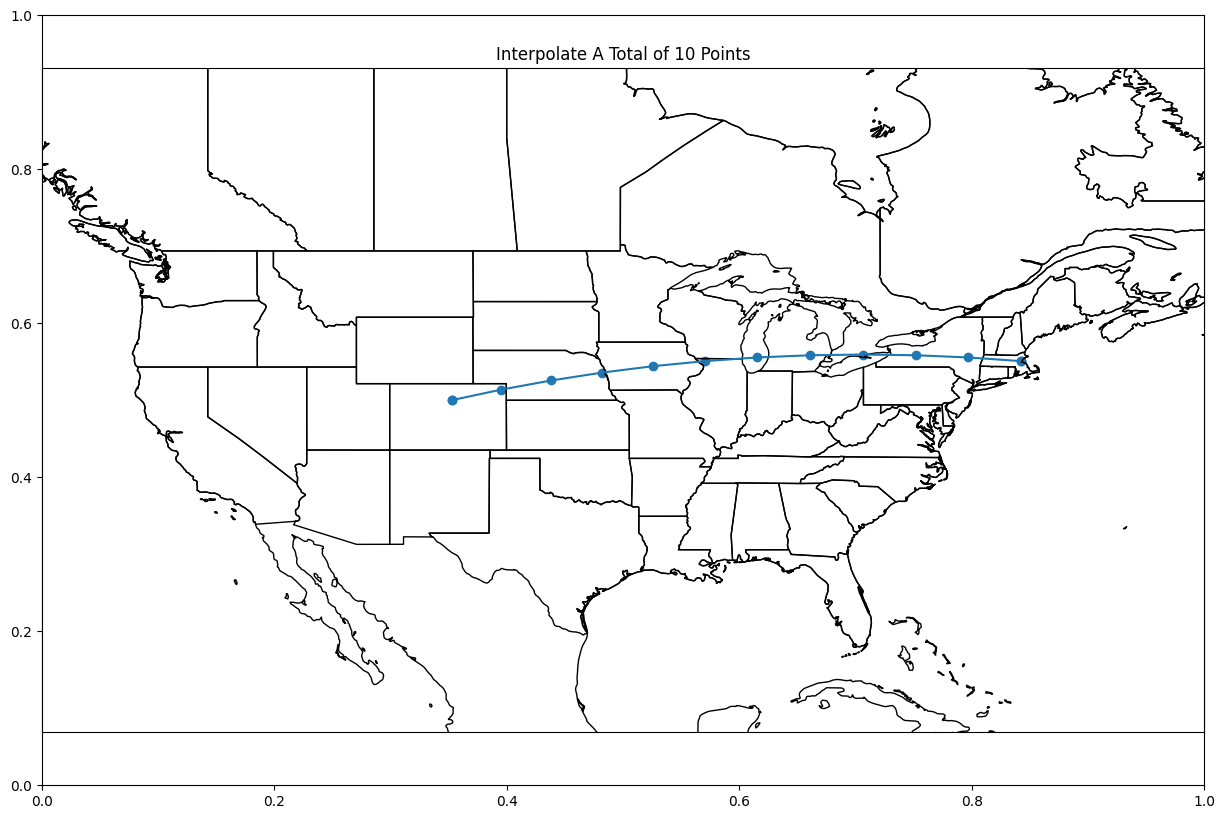

In [1684]:
every_n_with_start_end = [(boulder_coords["latitude"], boulder_coords["longitude"])] + every_n_pts + [(boston_coords["latitude"],boston_coords["longitude"])]
plot_coordinate(every_n_with_start_end, f"Interpolate A Total of {n_total_points} Points")

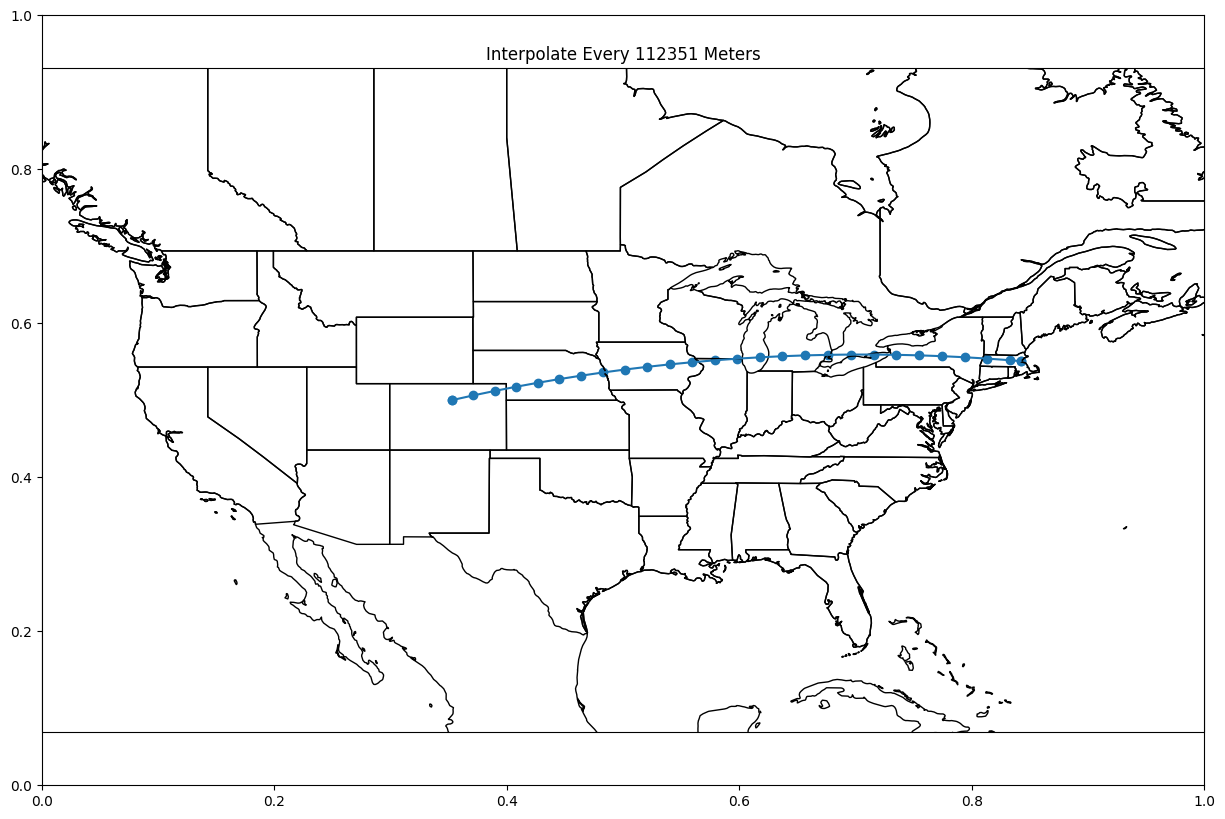

In [1685]:
every_n_meters_with_start_end = [(boulder_coords["latitude"], boulder_coords["longitude"])] + every_n_meters_pts + [(boston_coords["latitude"],boston_coords["longitude"])]
plot_coordinate(every_n_meters_with_start_end, f"Interpolate Every {distance_between_points_meter} Meters")

### TODO: Intermediate Point
> Here we find points (lat,lon) a given fraction of the distance (d) between them. Suppose the starting point is (lat1,lon1) and the final point (lat2,lon2) and we want the point a fraction f along the great circle route. f=0 is point 1. f=1 is point 2. The two points cannot be antipodal ( i.e. lat1+lat2=0 and abs(lon1-lon2)=pi) because then the route is undefined. The intermediate latitude and longitude is then given by
```
A=sin((1-f)*d)/sin(d)
B=sin(f*d)/sin(d)
x = A*cos(lat1)*cos(lon1) +  B*cos(lat2)*cos(lon2)
y = A*cos(lat1)*sin(lon1) +  B*cos(lat2)*sin(lon2)
z = A*sin(lat1)           +  B*sin(lat2)
lat=atan2(z,sqrt(x^2+y^2))
lon=atan2(y,x)
```


## gc_pnt2gc: Finds the angular distance from a point to a great circle 

- Cross track distance: angular distance from point P to great circle path
- Along track distance: angular distance along the great circle path from A to B before hitting a point that is closest to point P

Cross-Track Distance, sometimes known as cross track error, can also be determined with vectors (typically simpler too)

### Cross Track Distance
Distance of a poitn to a great circle arc

```
dxt = asin( sin(δ13) ⋅ sin(θ13−θ12) ) * R
```
- δ13 (delta_13) is (angular) distance from start point to third point
- θ13 (theta_13) is (initial) bearing from start point to third point
- θ12 (theta_12) is (initial) bearing from start point to end point
- R is the earth’s radius

```
d_xt = np.arcsin(np.sin(delta_13)*np.sin(theta_13 - theta_12)) * R
```
```
XTD =asin(sin(dist_AD)*sin(crs_AD-crs_AB))
```
> positive XTD means right of course, negative means left

> If the point A is the N. or S. Pole replace crs_AD-crs_AB with 
lon_D-lon_B or lon_B-lon_D, respectively
 
### Along Track Distance

```
dat = acos( cos(δ13) / cos(δxt) ) * R
```
- δ13 (delta_13) is (angular) distance from start point to third point
- δxt (delta_xt) is (angular) cross-track distance
- R is the earth’s radius

```
d_at = np.arccos(np.cos(delta_13)/np.cos(d_xt/R)) * R
```
```
ATD=acos(cos(dist_AD)/cos(XTD))
```
>  For very short distances (is less susceptible to rounding error):
```
ATD=asin(sqrt( (sin(dist_AD))^2 - (sin(XTD))^2 )/cos(XTD))
```
References:
- [Aviation Formulary V1.47](https://edwilliams.org/avform147.htm)
- [Moveable Type Script](www.movable-type.co.uk/scripts/latlong.html)

In [1686]:
def cross_track_distance(start_point=None, end_point=None, new_point=None):
    fwd_bearing_start_end, _, _ = geodesic.inv(start_point["longitude"],
                                               start_point["latitude"], 
                                               end_point["longitude"],
                                               end_point["latitude"])
    fwd_bearing_start_new, _, distance_m_start_new = geodesic.inv(start_point["longitude"],
                                                                  start_point["latitude"], 
                                                                  new_point["longitude"],
                                                                  new_point["latitude"]) 

    angular_distance_start_new = distance_m_start_new / earth_radius
    ct_distance = np.arcsin(np.sin(angular_distance_start_new) * np.sin(np.deg2rad(fwd_bearing_start_new - fwd_bearing_start_end))) * earth_radius
    return ct_distance

In [1687]:
def along_track_distance(start_point=None, end_point=None, new_point=None):
    crosst_distance = cross_track_distance(start_point, end_point, new_point)

    _, _, distance_m_start_new = geodesic.inv(start_point["longitude"],
                                               start_point["latitude"], 
                                               new_point["longitude"],
                                               new_point["latitude"])  
    angular_distance_start_new = distance_m_start_new / earth_radius
    at_distance = np.arccos(np.cos(angular_distance_start_new) / np.cos(crosst_distance / earth_radius)) * earth_radius
    return at_distance

In [1688]:
# Distance point along great circle path
# "Destination point given distance and bearing from start point"
def point_along_path(start_point=None, end_point=None, distance=None):
    fwd_bearing, _, _ = geodesic.inv(start_point["longitude"],
                                               start_point["latitude"], 
                                               end_point["longitude"],
                                               end_point["latitude"])  
    '''
    print(start_point["latitude"], start_point["longitude"])
    print(f"forward bearing            = {fwd_bearing}")
    print(f"distance to travel         = {distance/1000} km")

    final_lat = np.arcsin( np.sin(np.deg2rad(start_point["latitude"])) * 
                           np.cos(distance/earth_radius) + 
                           np.cos(np.deg2rad(start_point["latitude"])) *
                           np.sin(distance/earth_radius) *
                           np.cos(np.deg2rad(fwd_bearing)))

    x = np.sin(np.rad2deg(fwd_bearing)) * np.sin(distance/earth_radius) * np.cos(np.deg2rad(start_point["latitude"]))
    y = np.cos(distance/earth_radius) - np.sin(np.deg2rad(start_point["latitude"])) * np.sin(np.rad2deg(final_lat))
    final_lon = np.deg2rad(start_point["longitude"]) + np.arctan2(x, y)
    # noramlize longitude from -180 to 180
    #normal_lon = np.mod(final_lon + 540, 360) - 180
    return (np.rad2deg(final_lat), np.rad2deg(final_lon))
    '''
    origin = geopy.Point(start_point["latitude"], start_point["longitude"])
    distance_to_move = geopy.distance.distance(
                            kilometers=distance / 1000)  # distance to move towards the next point
    final_position = distance_to_move.destination(origin, bearing=fwd_bearing)
    return (final_position.latitude, final_position.longitude)

In [1689]:
### Distance from Boulder->Boston Great Circle Path to New Point
## EXAMPLE:
ct_distance = cross_track_distance(boulder_coords, boston_coords, wichita_coords)
print(f"Cross Track Distance: \n{ct_distance} meters ({ct_distance/1000} km)")

at_distance = along_track_distance(boulder_coords, boston_coords, wichita_coords)
print(f"Along Track Distance: \n{at_distance} meters ({at_distance/1000} km)\n")

closest_point = point_along_path(boulder_coords, boston_coords, at_distance)
print(f"Closest Point To Point Along Great Circle Path:\n{closest_point}") 
# compare with: https://www.fcc.gov/media/radio/find-terminal-coordinates

Cross Track Distance: 
416299.91386936075 meters (416.29991386936075 km)
Along Track Distance: 
607142.398159732 meters (607.142398159732 km)

Closest Point To Point Along Great Circle Path:
(41.35983856574507, -98.30638480837355)


### Plot Arcs

In [1690]:
def arc_points(start_lat=None,
               start_lon=None,
               end_lat=None,
               end_lon=None,
               n_total_points=10):
    _, _, distance_meter =  geodesic.inv(start_lon,
                                        start_lat,
                                        end_lon,
                                        end_lat)
        
    distance_between_points_meter = distance_meter / (n_total_points + 1)

    
    new_points_lst = interpolate_points_along_gc(start_lat,
                                              start_lon,
                                              end_lat,
                                              end_lon,
                                              distance_between_points_meter)
    return new_points_lst

In [1691]:
def plot_arcs(great_circle_arc_pts=None,
              new_point_arc_pts=None,
              closest_point=None,
              cross_track_distance=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    longitudes = [x[1] for x in great_circle_arc_pts] # longitude
    latitudes = [x[0] for x in great_circle_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="purple")
    plt.scatter(longitudes, latitudes, c="purple")

    longitudes = [x[1] for x in new_point_arc_pts] # longitude
    latitudes = [x[0] for x in new_point_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="green")
    plt.scatter(longitudes, latitudes, c="green")

    # plot closest_point in red
    plt.scatter(closest_point[1], closest_point[0], c="red")

    plt.title(f"Closest Point to Arc {closest_point}, Cross-Track Distance = {cross_track_distance} km")
    plt.show()

In [1692]:
def generate_example_data_and_plot(start_coords, end_coords, new_point_coords):
    ### Distance from Boulder->Boston Great Circle Path to New Point
    ct_distance = cross_track_distance(start_coords, end_coords, new_point_coords)
    print(f"Cross Track Distance: \n{ct_distance} meters ({ct_distance/1000} km)")

    at_distance = along_track_distance(start_coords, end_coords, new_point_coords)
    print(f"Along Track Distance: \n{at_distance} meters ({at_distance/1000} km)")

    closest_point = point_along_path(start_coords, end_coords, at_distance)
    print(f"Closest Point To Point Along Great Circle Path:\n{closest_point}") 

    # Plot
    great_circle_arc_points = arc_points(start_coords["latitude"],
                                     start_coords["longitude"],
                                     end_coords["latitude"],
                                     end_coords["longitude"],
                                    10)
    new_point_arc_points = arc_points(closest_point[0],
                                  closest_point[1],
                                  new_point_coords["latitude"],
                                  new_point_coords["longitude"],
                                 10)

    plot_arcs(great_circle_arc_points, new_point_arc_points, closest_point, ct_distance/1000)    

Cross Track Distance: 
416299.91386936075 meters (416.29991386936075 km)
Along Track Distance: 
607142.398159732 meters (607.142398159732 km)
Closest Point To Point Along Great Circle Path:
(41.35983856574507, -98.30638480837355)


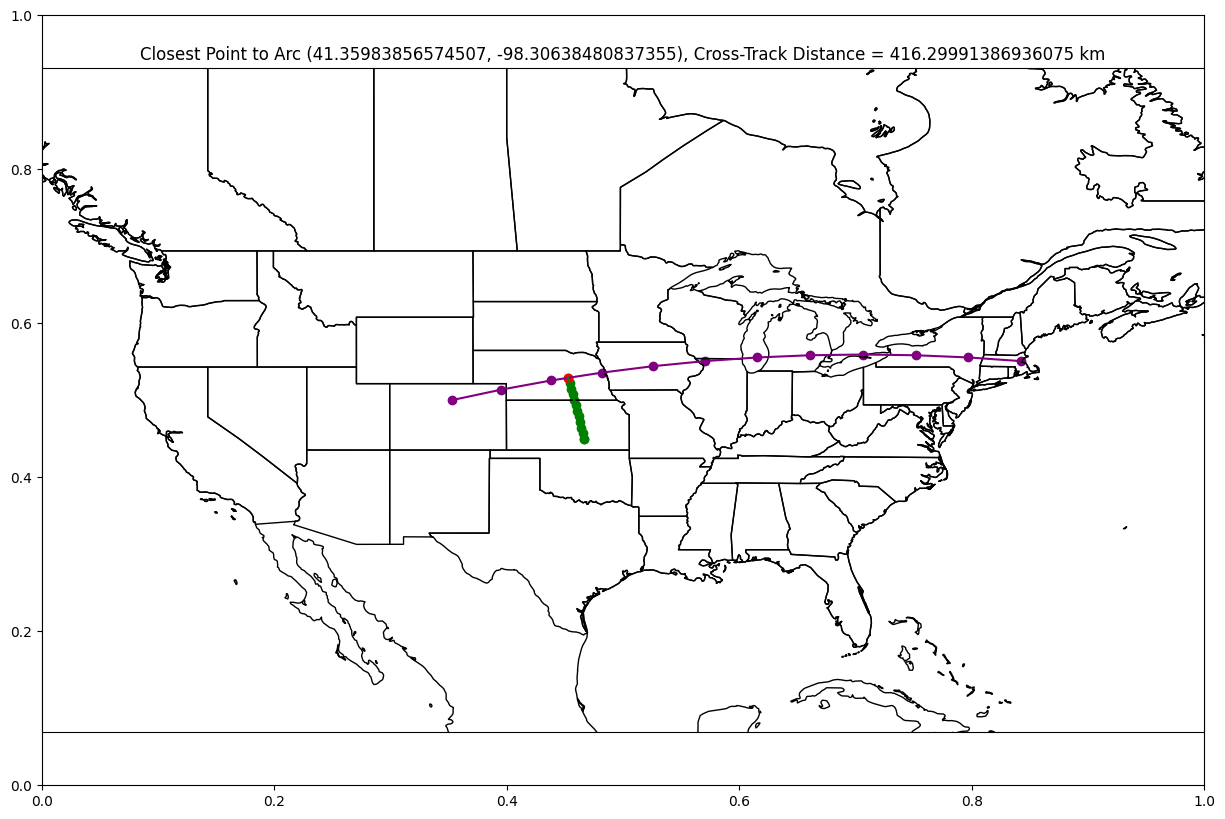

In [1693]:
generate_example_data_and_plot(boulder_coords, boston_coords, wichita_coords)

Cross Track Distance: 
1320820.0818162917 meters (1320.8200818162916 km)
Along Track Distance: 
1046317.7848823429 meters (1046.317784882343 km)
Closest Point To Point Along Great Circle Path:
(42.06180730392739, -93.11233142501752)


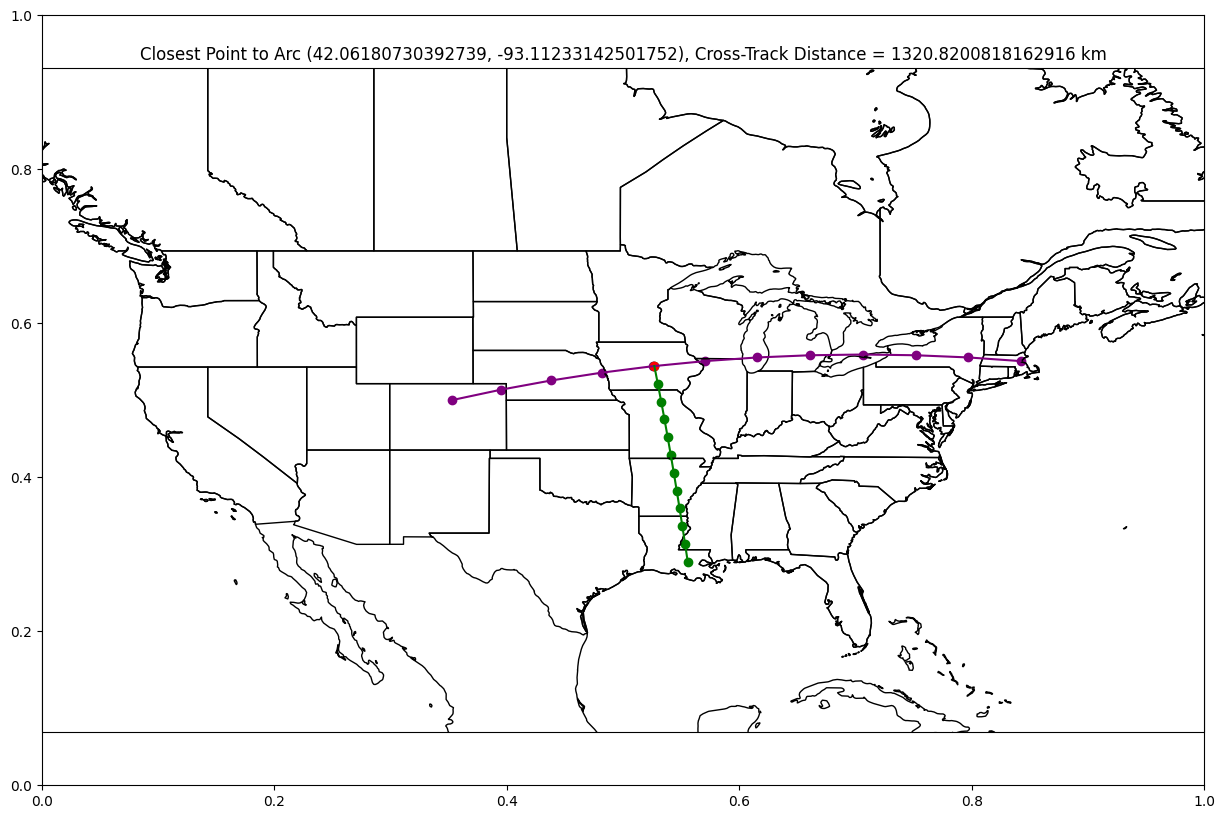

In [1694]:
baton_rouge_lat_lon = (30.27, -91.10)
new_point_lat_lon = baton_rouge_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
1313960.8826395303 meters (1313.9608826395304 km)
Along Track Distance: 
621566.8858927714 meters (621.5668858927714 km)
Closest Point To Point Along Great Circle Path:
(41.386598145433815, -98.13766368733828)


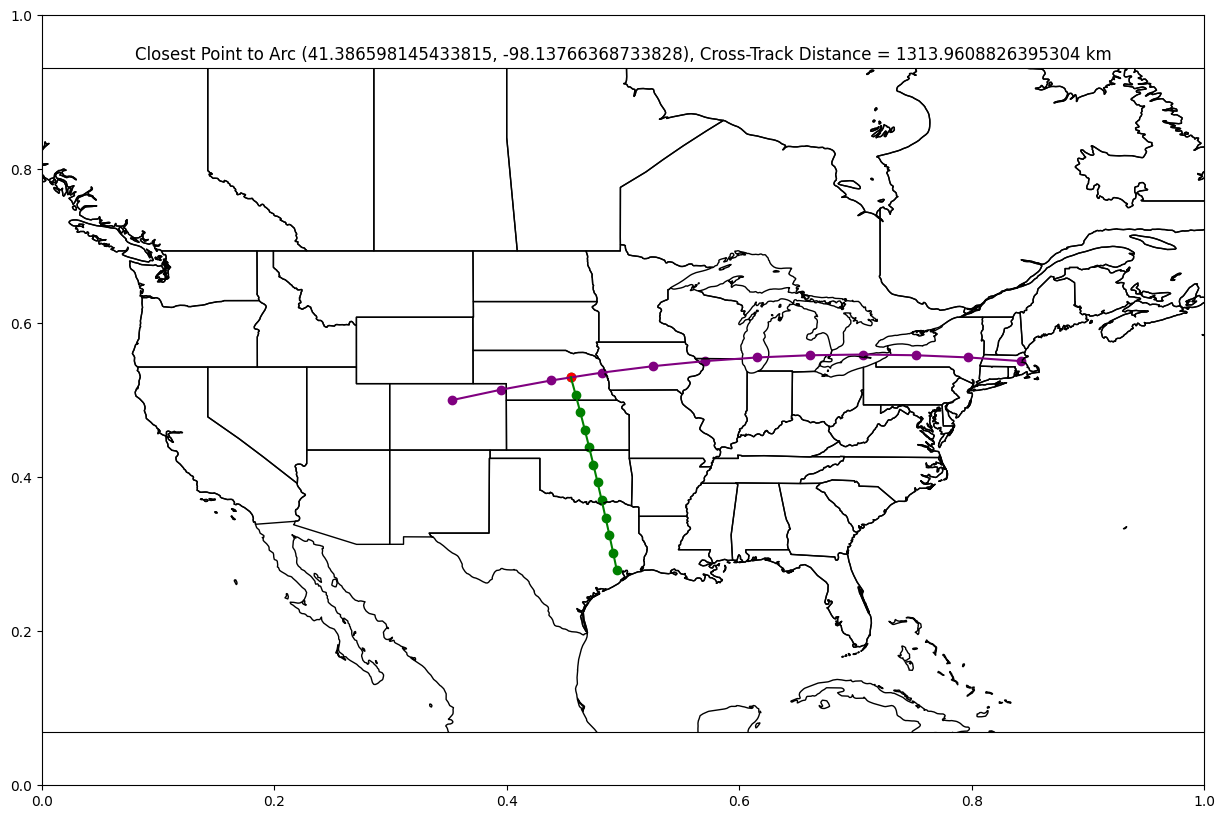

In [1695]:
houston_lat_lon = (29.76, -95.37) # NASA
new_point_lat_lon = houston_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
296883.18278176885 meters (296.8831827817688 km)
Along Track Distance: 
2542319.4122483437 meters (2542.3194122483437 km)
Closest Point To Point Along Great Circle Path:
(42.61746878737948, -74.9393760063952)


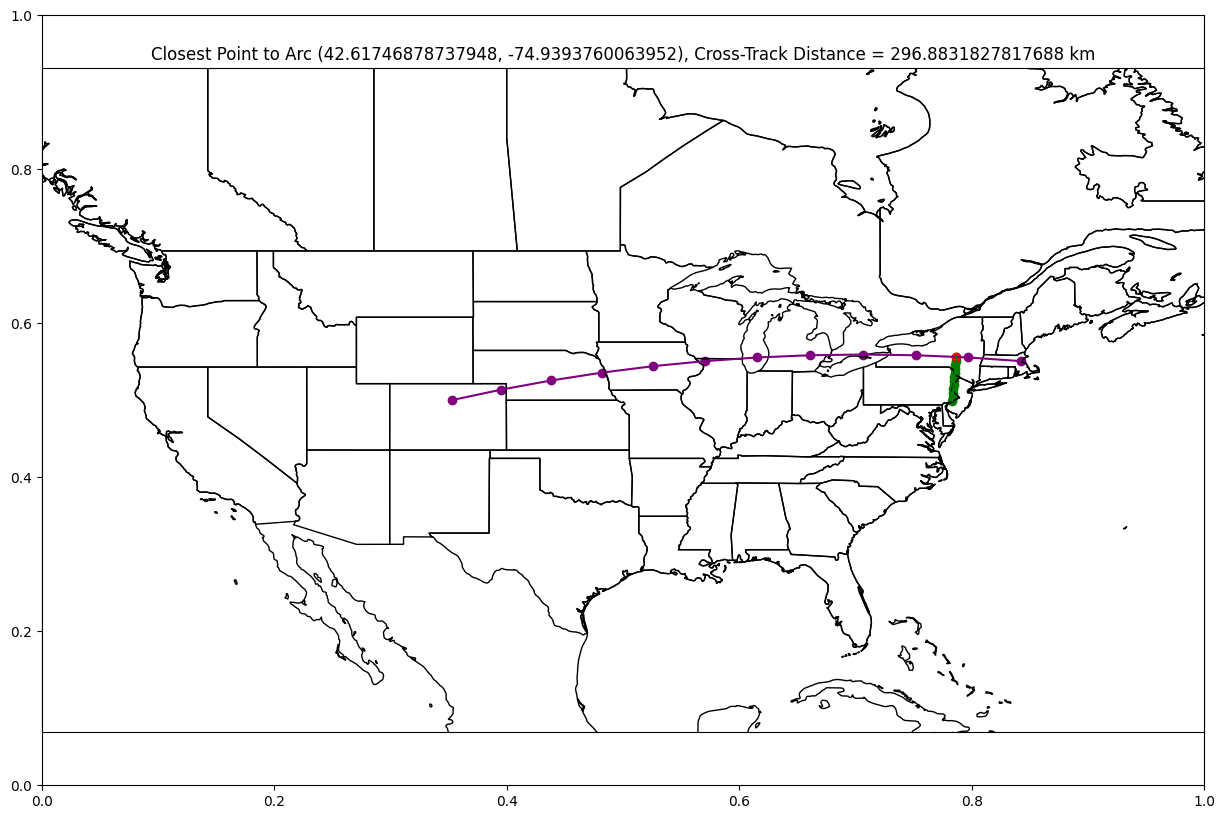

In [1696]:
philadelphia_lat_lon = (39.95, -75.17)
new_point_lat_lon = philadelphia_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

## TODO: Solve for Points Beyond Arc

_Current Bug_: appears to be using the middle of the arc

Cross Track Distance: 
208591.98526692743 meters (208.59198526692742 km)
Along Track Distance: 
1297936.272721694 meters (1297.9362727216942 km)
Closest Point To Point Along Great Circle Path:
(42.35652501751043, -90.09105248940998)


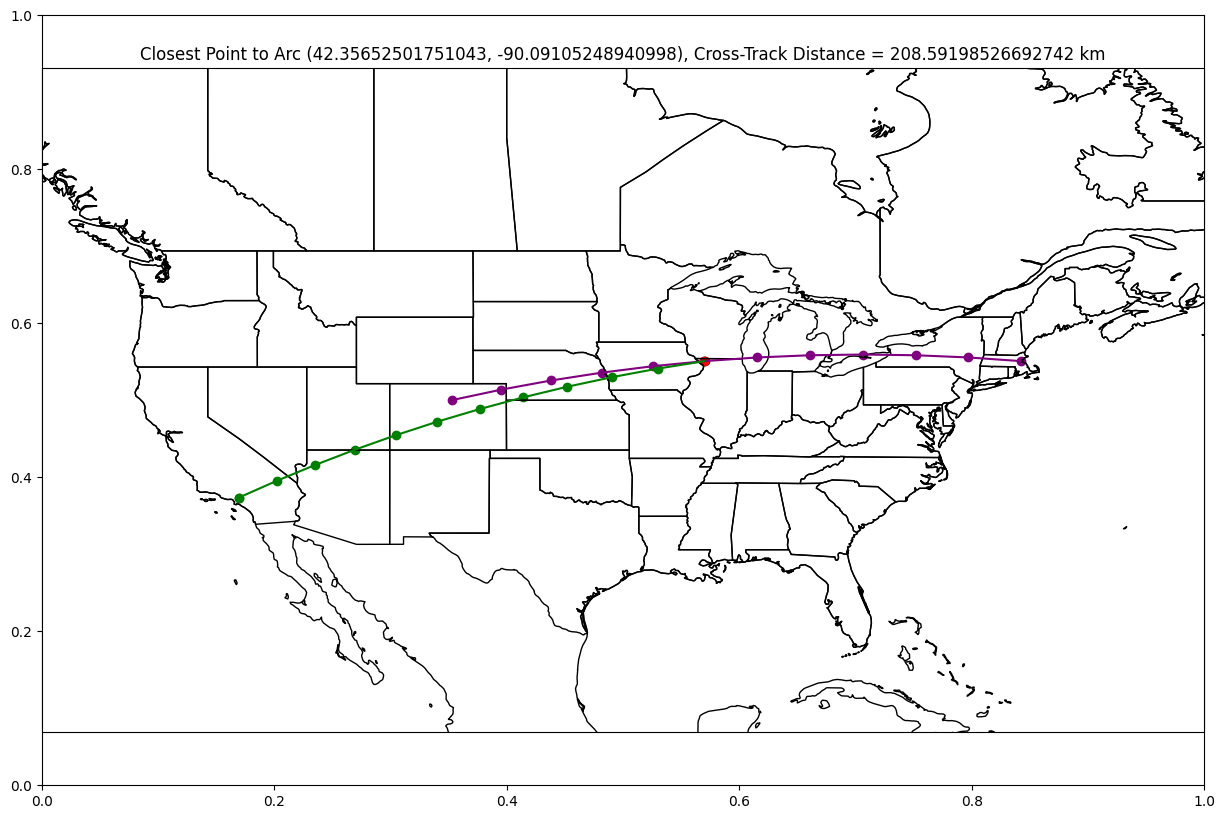

In [1697]:
caltech_lat_lon = (34.14, -118.13)
new_point_lat_lon = caltech_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
-743815.4433657554 meters (-743.8154433657554 km)
Along Track Distance: 
1408988.2839956256 meters (1408.9882839956256 km)
Closest Point To Point Along Great Circle Path:
(42.461135406283205, -88.7493878740062)


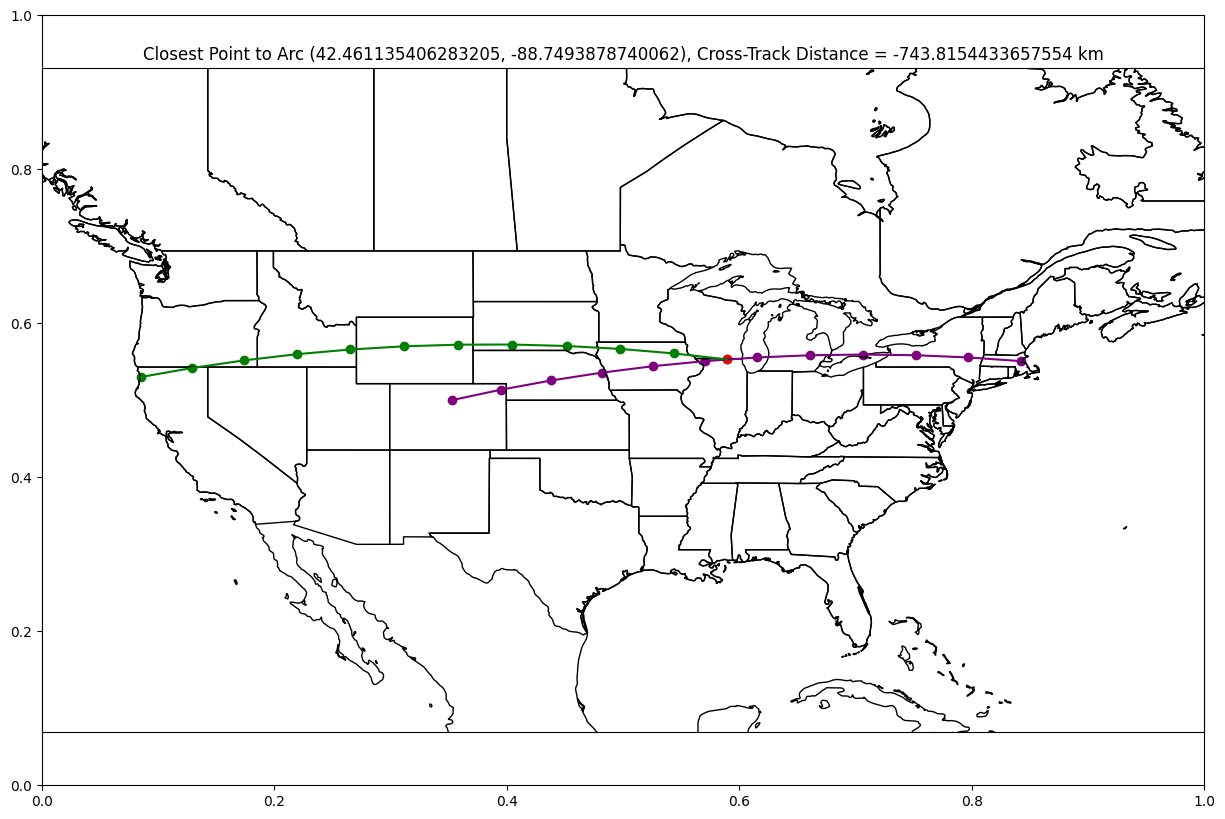

In [1698]:
red_woods_lat_lon = (41.40, -124.04)
new_point_lat_lon = red_woods_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
377060.0143628207 meters (377.0600143628207 km)
Along Track Distance: 
139824.92037864792 meters (139.82492037864793 km)
Closest Point To Point Along Great Circle Path:
(40.36170423779019, -103.6919986508387)


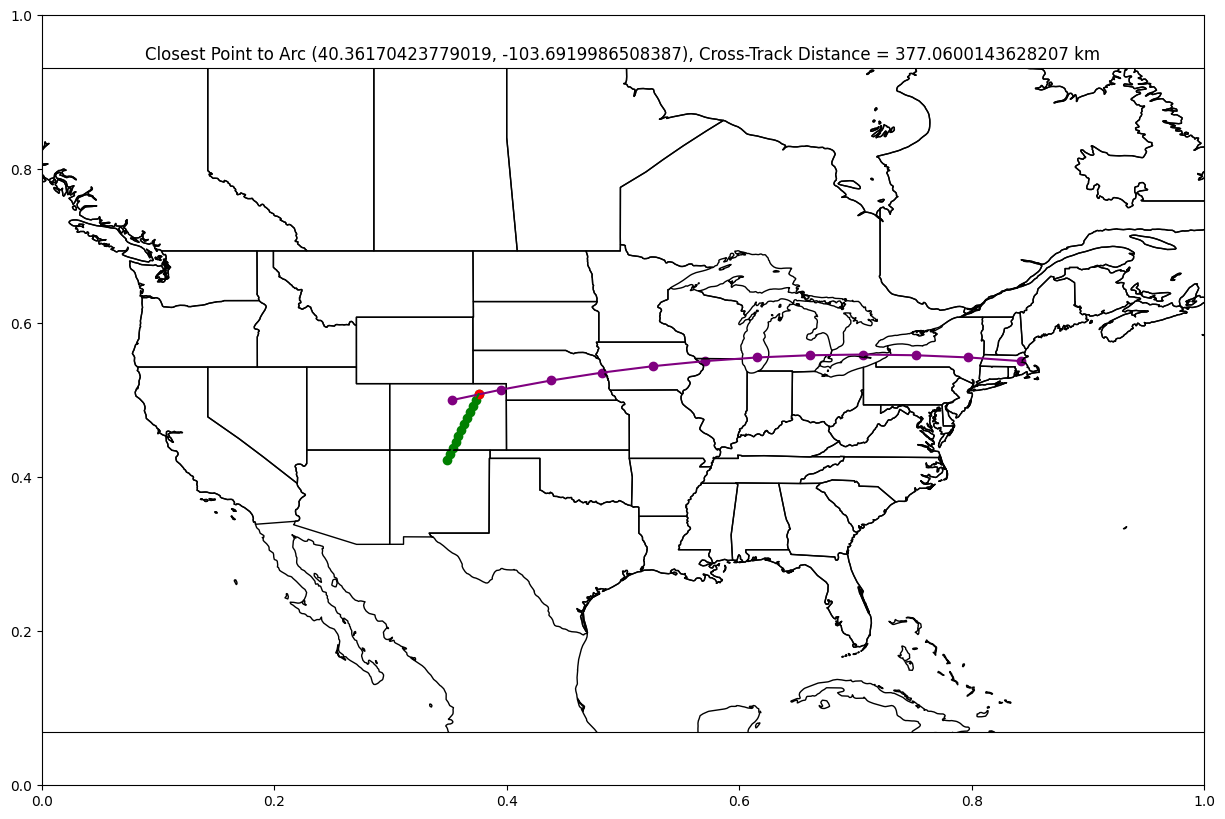

In [1699]:
taos_lat_lon = (36.40, -105.57)
new_point_lat_lon = taos_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
247175.4661611764 meters (247.1754661611764 km)
Along Track Distance: 
233331.4563023187 meters (233.33145630231868 km)
Closest Point To Point Along Great Circle Path:
(40.5814353178229, -102.62756564813134)


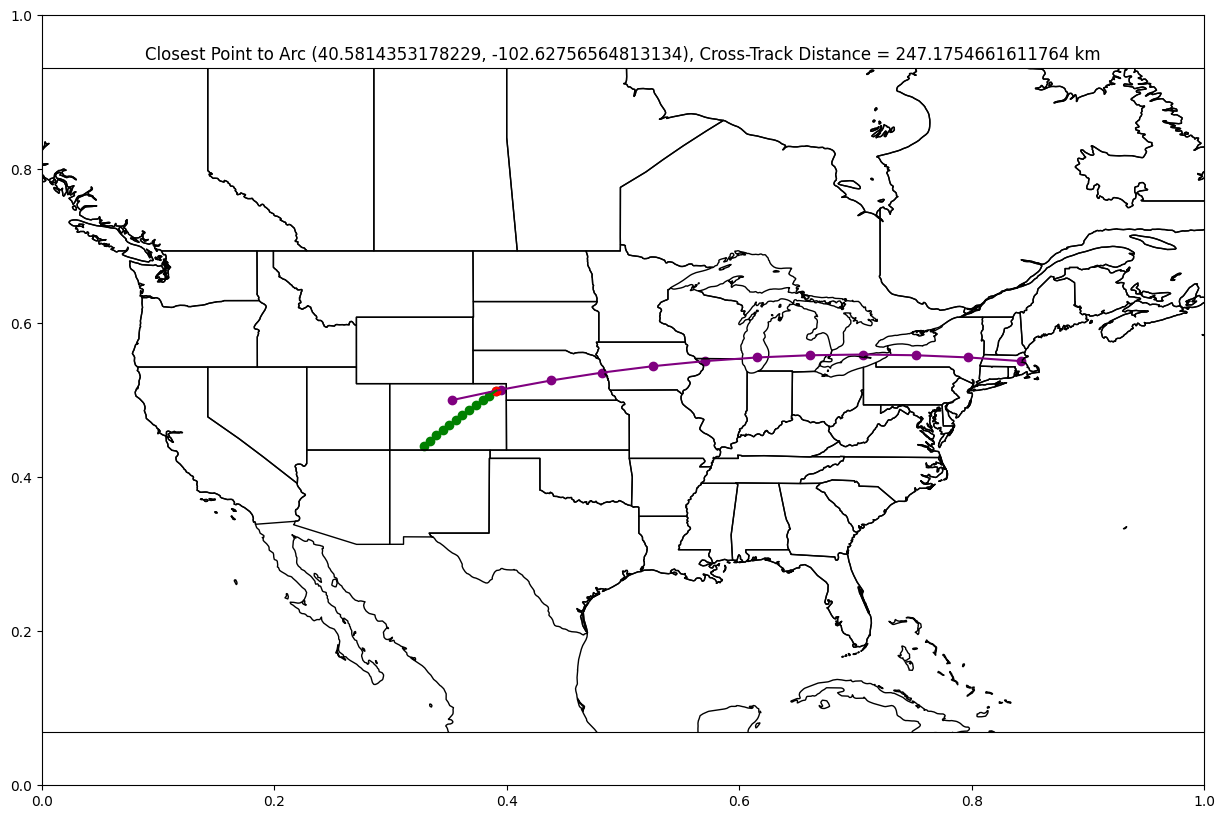

In [1700]:
pagosa_spring_lat_lon = (37.27, -107.0)
new_point_lat_lon = pagosa_spring_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

### TODO: Cross-Track Distance via Vectors

[Cross-track distance via vectors](http://www.movable-type.co.uk/scripts/latlong-vectors.html#intersection)

> Since a great circle is represented by a vector perpendicular to the plane, if α is the angle between the vector representing the point and vector representing the great circle, then the distance from the point to the great circle is:
```
d = R · (90° − α)
```

## Get Points on Great Circle Defined by Two Points in Circle

> Any two distinct points on a sphere that are not antipodal (diametrically opposite) both lie on a unique great circle, which the points separate into two arcs; the length of the shorter arc is the great-circle distance between the points. This arc length is proportional to the central angle between the points, which if measured in radians can be scaled up by the sphere's radius to obtain the arc length. Two antipodal points both lie on infinitely many great circles, each of which they divide into two arcs of length π times the radius.

[Great Circle Distance](https://en.wikipedia.org/wiki/Great-circle_distance)

### Latitude of Point on Great Circle
[Intermeditate points along the great circle](https://www.edwilliams.org/avform147.htm#Int)
> Intermediate points {lat,lon} lie on the great circle connecting points 1 and 2 when:
```
# Latitude
lat=atan((sin(lat1)*cos(lat2)*sin(lon-lon2)
     -sin(lat2)*cos(lat1)*sin(lon-lon1))/(cos(lat1)*cos(lat2)*sin(lon1-lon2)))
```

> Not applicable for meridians (where there are infinte possible great cirlces), defined by:
```
sin(lon1-lon2) = 0
```

In [1701]:
# generate n total number of longitude points along the great circle
# https://github.com/rspatial/geosphere/blob/master/R/greatCircle.R#L18C3-L18C7
def generate_longitude_along_gc(n_pts=None):
    gc_lon = []
    for lon in range(1, n_pts+1):
        new_lon = (lon  * (360/n_pts) - 180)
        gc_lon.append(new_lon)
    print(f"{len(gc_lon)} total of longitude points")
    return gc_lon

In [1702]:
# generate latitude points along the great circle
# https://www.edwilliams.org/avform147.htm#Int
# https://github.com/rspatial/geosphere/blob/master/R/gcLat.R
def generate_latitude_along_gc(start_point=None, end_point=None, longitude_lst=None):
    lon1 = np.deg2rad(start_point["longitude"])
    lat1 = np.deg2rad(start_point["latitude"])
    lon2 = np.deg2rad(end_point["longitude"])
    lat2 = np.deg2rad(end_point["latitude"])

    # Verify not meridian (longitude passes through the poles)
    if np.sin(lon1 - lon2) == 0:
        raise ValueError("Invalid inputs: start/end points are meridians")

    # verify not anitpodal (diametrically opposite, points)
    # possible: https://github.com/rspatial/geosphere/blob/master/R/antipodal.R
    # Intermediate points on a great circle: https://edwilliams.org/avform147.htm :
    if lat1 + lat2 == 0 and abs(lon1-lon2) == np.pi:
        raise ValueError("Invalid inputs: start/end points are antipodal")

    # note: can be expanded to handle input of np arrays by filter out antipodal/merdiain points
    
    lon_lst = np.deg2rad(longitude_lst)

    gc_lat = []
    for gc_lon in lon_lst:
        #atan((sin(lat1)*cos(lat2)*sin(lon-lon2)-sin(lat2)*cos(lat1)*sin(lon-lon1))/(cos(lat1)*cos(lat2)*sin(lon1-lon2)))
        #atan((sin(lat1)*cos(lat2)*sin(lon-lon2)-sin(lat2)*cos(lat1)*sin(lon-lon1))/(cos(lat1)*cos(lat2)*sin(lon1-lon2)))
        num = np.sin(lat1)*np.cos(lat2)*np.sin(gc_lon-lon2)-np.sin(lat2)*np.cos(lat1)*np.sin(gc_lon-lon1)
        den = np.cos(lat1)*np.cos(lat2)*np.sin(lon1-lon2)
        new_lat = np.arctan(num/den)
        gc_lat.append(np.rad2deg(new_lat))
    print(f"{len(gc_lat)} total of latitude points")
    return gc_lat


In [1703]:
def plot_coordinate(lat_lst=None, lon_lst=None,
                    start_point=None, end_point=None,
                    title=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    plt.plot(lon_lst, lat_lst)
    plt.scatter(lon_lst, lat_lst)

    # Overly great circle from start/end point
    start_end_lat_lon = arc_points(start_point["latitude"],start_point["longitude"],
                                   end_point["latitude"], end_point["longitude"],
                                   n_total_points=10)
    longitudes = [x[1] for x in start_end_lat_lon] # longitude
    latitudes = [x[0] for x in start_end_lat_lon] # latitude
    plt.plot(longitudes, latitudes, c="red")
    plt.scatter(longitudes, latitudes, c="red")
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    #plt.xlabel("Longitude (Degrees)")
    #plt.ylabel("Latitude (Degrees)")
    plt.show()

In [1704]:
n = 360
lon_pts = generate_longitude_along_gc(n)

360 total of longitude points


360 total of latitude points


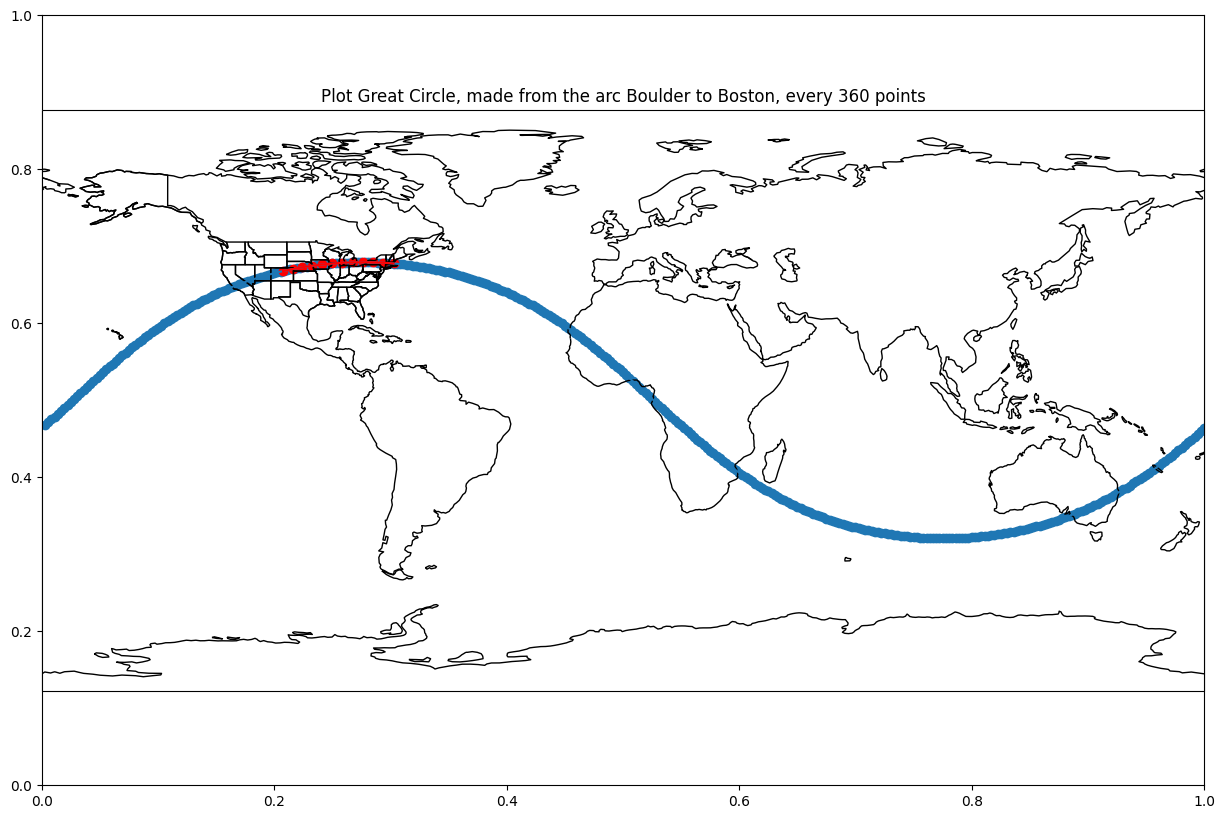

In [1705]:
lat_pts = generate_latitude_along_gc(boulder_coords, boston_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, boston_coords,
                f"Plot Great Circle, made from the arc Boulder to Boston, every {n} points")

360 total of latitude points


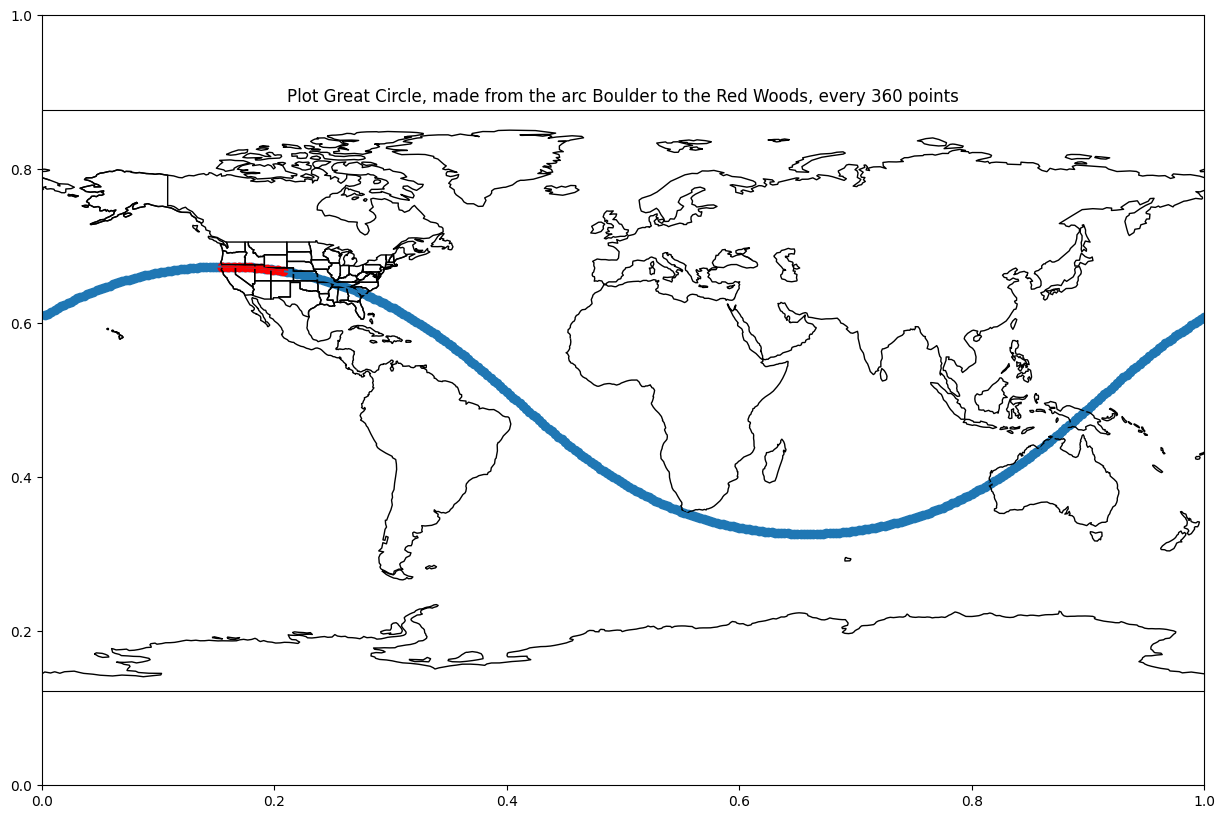

In [1706]:
red_woods_lat_lon = (41.40, -124.04)
new_point_lat_lon = red_woods_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the Red Woods, every {n} points")

360 total of latitude points


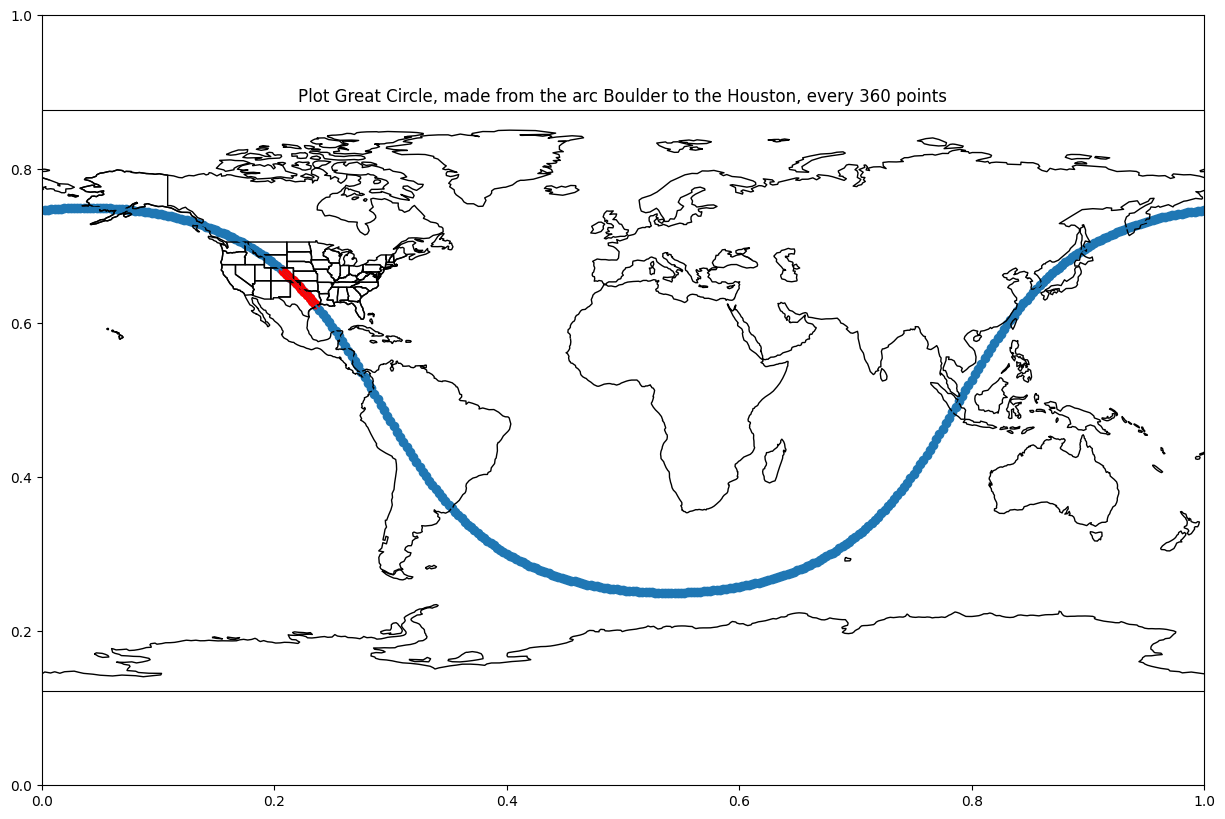

In [1707]:
houston_lat_lon = (29.76, -95.37) # NASA
new_point_lat_lon = houston_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the Houston, every {n} points")

360 total of latitude points


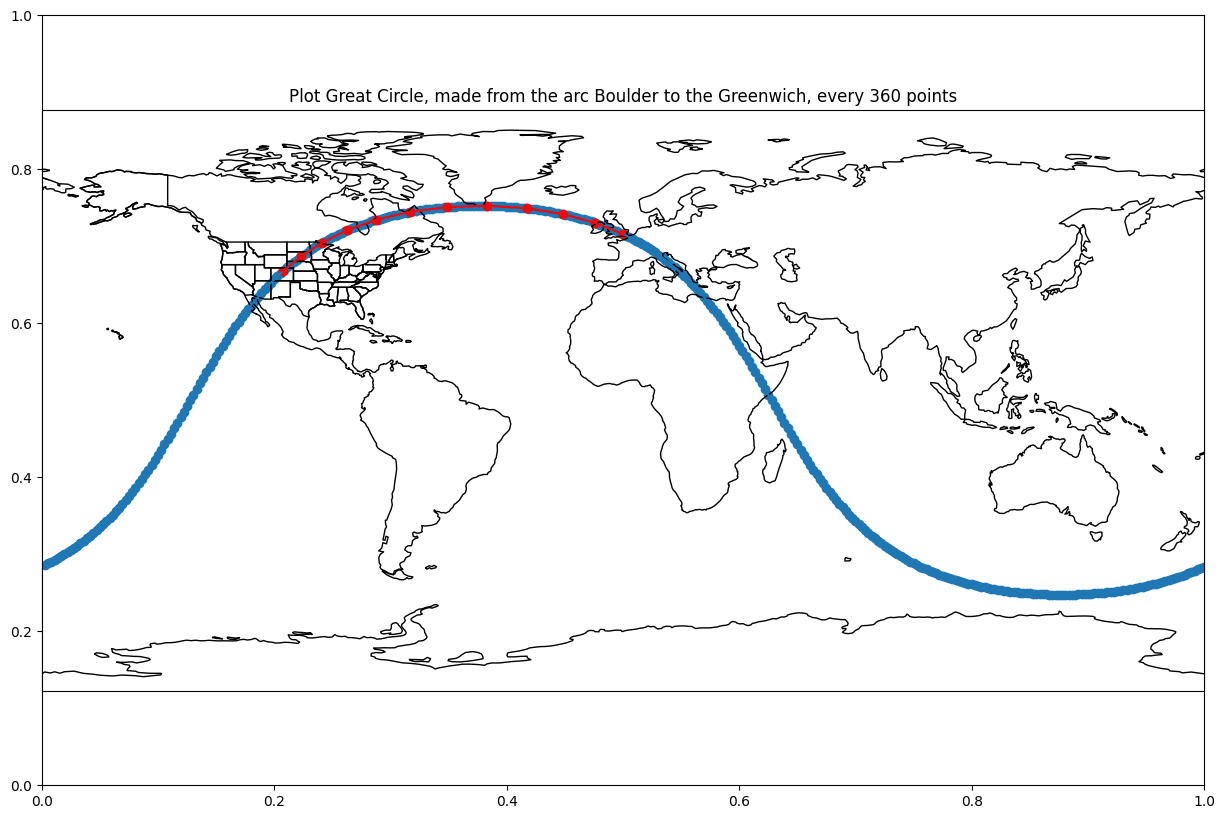

In [1708]:
greenwich_lat_lon = (51.49, 0.0098)
new_point_lat_lon = greenwich_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the Greenwich, every {n} points")

360 total of latitude points


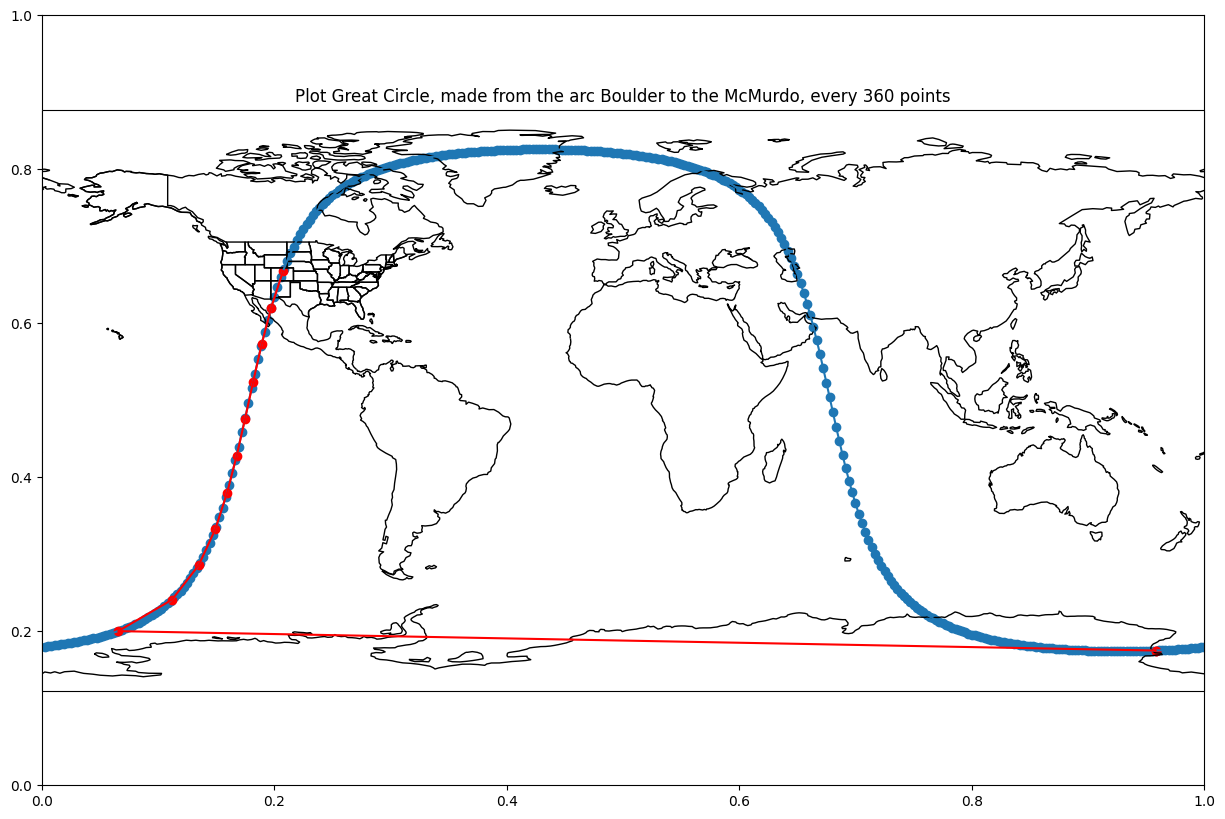

In [1713]:
mcmurdo_lat_lon = (-77.5, 165)
new_point_lat_lon = mcmurdo_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the McMurdo, every {n} points")

360 total of latitude points


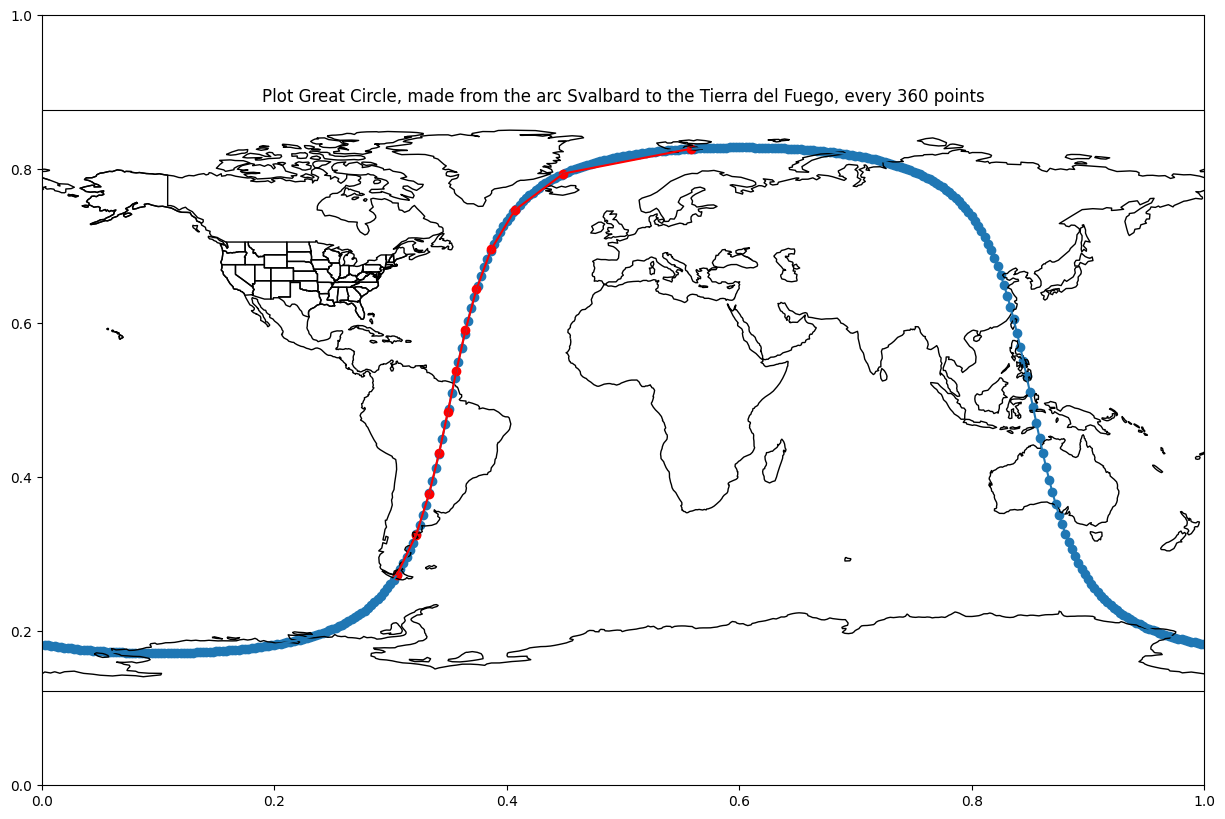

In [1717]:
svalbard_lat_lon = (77.88, 20.98)
svalbard_lat_lon_coords = return_all_coords(svalbard_lat_lon[0], svalbard_lat_lon[1])
tierradelfuego_lat_lon = (-54.0, -70)
tierradelfuego_lat_lon_coords = return_all_coords(tierradelfuego_lat_lon[0], tierradelfuego_lat_lon[1])
lat_pts = generate_latitude_along_gc(svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords,
                f"Plot Great Circle, made from the arc Svalbard to the Tierra del Fuego, every {n} points")

## TODO

- Closet point to the poles: Clairaut’s formula’ will give you the maximum latitude of a great circle path, given a bearing θ and latitude φ on the great circle
```
max_lat = np.arccos(np.abs(np.sin(bearing)*Math.cos(latitude)))
```
- Midpoint between points along a great-circle arc: half-way point along a great circle path between the two points
```
# All angles in radians
Bx = Math.cos(φ2) * Math.cos(λ2-λ1)
By = Math.cos(φ2) * Math.sin(λ2-λ1)
φ3 = Math.atan2(Math.sin(φ1) + Math.sin(φ2), Math.sqrt( (Math.cos(φ1)+Bx)*(Math.cos(φ1)+Bx) + By*By ) )
λ3 = λ1 + Math.atan2(By, Math.cos(φ1) + Bx)
```
- Points(s) known distance from a great circle: Let points A and B define a great circle route and D be a third point. Find the points on the great circle through A and B that lie a distance d from D, if they exist
```
# crs_AB and crs_AD are the initial GC bearings from A to B and D, respectively
A = crs_AD - crs_AB
```

References
- [Moving Type Script](http://www.movable-type.co.uk/scripts/latlong.html)

> A great circle is a section of a sphere that contains a diamter of the sphere...A great circle becomes a straight line in a gnomoni c projection
> To find the great circle (geodesic) distance between two points located at latitude `delta` and longitude `lambda` of (delta_1, lamba_1) and (delta_2, lambda_2) on a sphere of radius a

[Wolfram MathWorld](https://mathworld.wolfram.com/GreatCircle.html)

1. Convert spherical coordinates to Cartesian coordinates using:

```
        | cos(lambda_i) * cos(delta_i) |
r_i = a | sin(lambda_i) * cos(delta_i) |
        |        sin(delta_i)          |
```
2. Find the angle `alpha` between r1 and r2 using the dot product
```
cos(alpha) = r_1_hat * r_2_hat
cos(alpha) = cos(delta_1) * cos(delta_2) * cos(lambda_1 - lambda_2) + sin(delta_1) * sin(delta_2)
```
3. The great circle distance is then: where a = 6378 km
```
d = a * cos^-1[cos(delta_1) * cos(delta_2) * cos(lambda_1 - lambda_2) + sin(delta_1) * sin(delta_2)]
```

In [1709]:
from pyproj import Geod
geodesic = Geod(ellps="WGS84")

## gc_aangle

This function finds the acute angle between two great circles, given two pairs of points on the globe that define two arcs. 

### Input:
Latitudes and longitudes, in degrees, of vertices. The first two pairs of lat/lon values specify vertices of an arc of one great circle and the second two pairs specify the vertices of the second circle. These can be multi-dimensional arrays, but the rightmost dimension size must be 4 for specifying the vertices of the two arcs. If lat and lon have more than one dimension, then they must agree in number of dimensions and dimension sizes.
Return value
### Output
The acute angle, in degrees, between the great circles defined by the arcs as describe above. This will be a non-negative value. If the input arrays are singly dimensioned, then the return value will be a scalar. If the input arrays are multi-dimensional, then the returned array will have one less dimension than the number of dimensions of the input arrays and the dimension sizes of the returned array will agree with those of the input arrays up through their penultimate dimension. The return value will be of type double if either of the input arguments is of type double and type float otherwise.

In [1710]:
aangle = ((0.0,  0.0, 0.0,  10.0), (0.0, 10.0, 0.0,   0.0))
arc_1_start  = (aangle[0][0], aangle[1][0])
arc_1_end    = (aangle[0][1], aangle[1][1])
arc_2_start  = (aangle[0][2], aangle[1][2])
arc_2_end    = (aangle[0][3], aangle[1][3])

print(arc_1_start) # (lat, lon)
print(arc_1_end)   # (lat, lon)

print(arc_2_end)   # (lat, lon)
print(arc_2_start) # (lat, lon)

#fwd_bearing, rvs_bearing, distance_m = geodesic.inv(lon_start, lat_start, lon_end, lat_end)
fwd_bearing, rvs_bearing, distance_m = geodesic.inv(arc_1_start[1],
                                                    arc_1_start[0],
                                                    arc_1_end[1],
                                                    arc_1_end[0])
print(f"forward bearing = {fwd_bearing} degrees")
print(f"reverse bearing = {rvs_bearing} degrees")
print(f"distance_m = {distance_m/1000} km")

(0.0, 0.0)
(0.0, 10.0)
(10.0, 0.0)
(0.0, 0.0)
forward bearing = 90.0 degrees
reverse bearing = -90.0 degrees
distance_m = 1113.1949079327358 km
